In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
v1 = pd.read_csv(f'data/aave_usdc_interest_v1.csv') 
v2 = pd.read_csv(f'data/aave_usdc_interest_v2.csv')

v1 = v1[v1['asset'] != 'empty']
v2 = v2[v2['asset'] != 'empty']

#v2 = v2[v2['timestamp'] >= '2021-01-01']

v1['version'] = 'aave_v1'
v2['version'] = 'aave_v2'

df = pd.concat([v1, v2], ignore_index=True)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.strftime('%Y-%m-%d')
df.sort_values(by='timestamp', ascending=True, inplace=True, ignore_index=True)
df[df['date'].duplicated(keep=False)] #show duplicates

#we align the methods to calculate the ma_30
df['supply_ma30'] = df['supply'].rolling(30, min_periods=1).mean()
df['borrow_ma30'] = df['borrow'].rolling(30, min_periods=1).mean()

aave_usdc = df

In [16]:
v1 = pd.read_csv(f'data/aave_usdt_interest_v1.csv') 
v2 = pd.read_csv(f'data/aave_usdt_interest_v2.csv')

v1 = v1[v1['asset'] != 'empty']
v2 = v2[v2['asset'] != 'empty']

#v2 = v2[v2['timestamp'] >= '2021-01-01']

v1['version'] = 'aave_v1'
v2['version'] = 'aave_v2'

df = pd.concat([v1, v2], ignore_index=True)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.strftime('%Y-%m-%d')
df.sort_values(by='timestamp', ascending=True, inplace=True, ignore_index=True)
df[df['date'].duplicated(keep=False)] #show duplicates

#we align the methods to calculate the ma_30
df['supply_ma30'] = df['supply'].rolling(30, min_periods=1).mean()
df['borrow_ma30'] = df['borrow'].rolling(30, min_periods=1).mean()

aave_usdt = df

In [22]:
v1 = pd.read_csv(f'data/aave_dai_interest_v1.csv') 
v2 = pd.read_csv(f'data/aave_dai_interest_v2.csv')

v1 = v1[v1['asset'] != 'empty']
v2 = v2[v2['asset'] != 'empty']

#v2 = v2[v2['timestamp'] >= '2021-01-01']

v1['version'] = 'aave_v1'
v2['version'] = 'aave_v2'

df = pd.concat([v1, v2], ignore_index=True)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.strftime('%Y-%m-%d')
df.sort_values(by='timestamp', ascending=True, inplace=True, ignore_index=True)
df[df['date'].duplicated(keep=False)] #show duplicates

#we align the methods to calculate the ma_30
df['supply_ma30'] = df['supply'].rolling(30, min_periods=1).mean()
df['borrow_ma30'] = df['borrow'].rolling(30, min_periods=1).mean()

aave_dai = df

In [28]:
df = pd.read_csv('data/compound_usdc_interest.csv')
df['version'] = 'compound'

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.strftime('%Y-%m-%d')
df.sort_values(by='timestamp', ascending=True, inplace=True, ignore_index=True)
df[df['date'].duplicated(keep=False)] #show duplicates

df['supply_ma30'] = df['supply'].rolling(30, min_periods=1).mean()
df['borrow_ma30'] = df['borrow'].rolling(30, min_periods=1).mean()

compound_usdc = df

In [ ]:
df = pd.read_csv('data/compound_usdt_interest.csv')
df['version'] = 'compound'

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.strftime('%Y-%m-%d')
df.sort_values(by='timestamp', ascending=True, inplace=True, ignore_index=True)
df[df['date'].duplicated(keep=False)] #show duplicates

df['supply_ma30'] = df['supply'].rolling(30, min_periods=1).mean()
df['borrow_ma30'] = df['borrow'].rolling(30, min_periods=1).mean()

compound_usdt = df

In [29]:
df = pd.read_csv('data/compound_dai_interest.csv')
df['version'] = 'compound'

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.strftime('%Y-%m-%d')
df.sort_values(by='timestamp', ascending=True, inplace=True, ignore_index=True)
df[df['date'].duplicated(keep=False)] #show duplicates

df['supply_ma30'] = df['supply'].rolling(30, min_periods=1).mean()
df['borrow_ma30'] = df['borrow'].rolling(30, min_periods=1).mean()

compound_dai = df

In [31]:
df_all = aave_usdc[['date', 'supply_ma30']] # slice aave
df_all.rename(columns={'supply_ma30': 'aave_usdc_supply_ma30'}, inplace=True)

df_all = df_all.merge(aave_usdt[['date', 'supply_ma30']], how='left', on='date') #merge compound
df_all.rename(columns={'supply_ma30': 'aave_usdt_supply_ma30'}, inplace=True)

df_all = df_all.merge(aave_dai[['date', 'supply_ma30']], how='left', on='date') #merge compound
df_all.rename(columns={'supply_ma30': 'aave_dai_supply_ma30'}, inplace=True)

df_all = df_all.merge(compound_usdc[['date', 'supply_ma30']], how='left', on='date') #merge compound
df_all.rename(columns={'supply_ma30': 'compound_usdc_supply_ma30'}, inplace=True)

df_all = df_all.merge(compound_usdt[['date', 'supply_ma30']], how='left', on='date') #merge compound
df_all.rename(columns={'supply_ma30': 'compound_usdt_supply_ma30'}, inplace=True)

df_all = df_all.merge(compound_dai[['date', 'supply_ma30']], how='left', on='date') #merge compound
df_all.rename(columns={'supply_ma30': 'compound_dai_supply_ma30'}, inplace=True)




/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [33]:
df_all = df_all.fillna(0)

In [36]:
df_all['count'] = 0
for i in range(0, len(df_all)):
    count = 0
    if df_all[df_all.columns[1]][i] > 0: 
        count +=1
    if df_all[df_all.columns[2]][i] > 0: 
        count +=1
    if df_all[df_all.columns[3]][i] > 0: 
        count +=1
    if df_all[df_all.columns[4]][i] > 0: 
        count +=1
    if df_all[df_all.columns[5]][i] > 0: 
        count +=1
    if df_all[df_all.columns[6]][i] > 0: 
        count +=1
    
    df_all['count'][i] = count

<ipython-input-36-5f7bda56739f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['count'][i] = count


In [38]:
df_all['mean'] = (df_all['aave_usdc_supply_ma30'] + df_all['aave_usdt_supply_ma30'] + df_all['aave_dai_supply_ma30'] + df_all['compound_usdc_supply_ma30'] + df_all['compound_usdt_supply_ma30'] + df_all['compound_dai_supply_ma30'])/df_all['count']


In [39]:
df_all

,date,aave_usdc_supply_ma30,aave_usdt_supply_ma30,aave_dai_supply_ma30,compound_usdc_supply_ma30,compound_usdt_supply_ma30,compound_dai_supply_ma30,count,mean
0,2020-01-08,0.000389,0.000011,0.011112,0.000000,0.000000,0.000000,3,0.003837
1,2020-01-09,0.008746,0.002085,0.029319,0.000000,0.000000,0.000000,3,0.013383
2,2020-01-10,0.019933,0.005398,0.091202,0.000000,0.000000,0.000000,3,0.038844
3,2020-01-11,0.025596,0.010163,0.080267,0.000000,0.000000,0.000000,3,0.038675
4,2020-01-12,0.028996,0.013234,0.072520,0.000000,0.000000,0.000000,3,0.038250
...,...,...,...,...,...,...,...,...,...
991,2022-08-26,0.005339,0.014094,0.007662,0.006928,0.015039,0.006639,6,0.009283
992,2022-08-27,0.005305,0.013937,0.007796,0.006962,0.014893,0.006678,6,0.009262
993,2022-08-28,0.005224,0.013766,0.007963,0.006984,0.014769,0.006715,6,0.009237
994,2022-08-29,0.005134,0.013587,0.008125,0.007004,0.014663,0.006771,6,0.009214


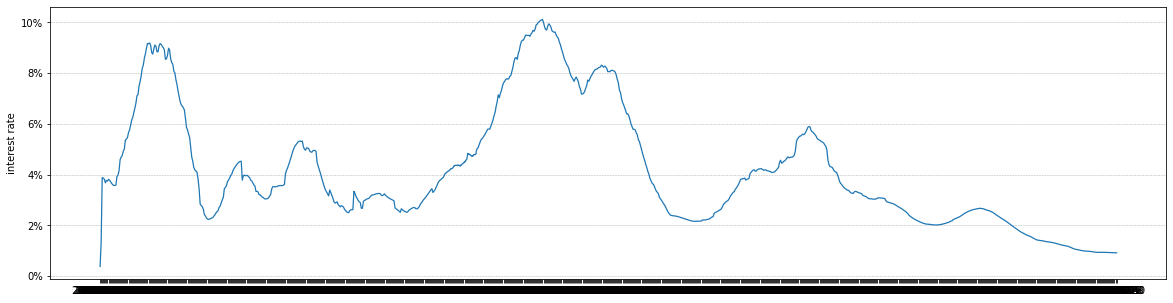

In [40]:
fig, ax = plt.subplots(figsize =(20,5))

ax.plot(df_all['date'], df_all['mean'], linewidth=1.25)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


ax.set_ylabel('interest rate')
ax.grid(axis='y', linestyle='--', linewidth=.5)

left, right = plt.xlim()
ax.set_xlim(left+1, right-1)

plt.show()

In [41]:
#store in csv
df_all.to_csv(f'data/usd_interest_combined.csv', index=False)